Aperçu du dataset :


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386



Types des colonnes :
Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

Statistiques générales :


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


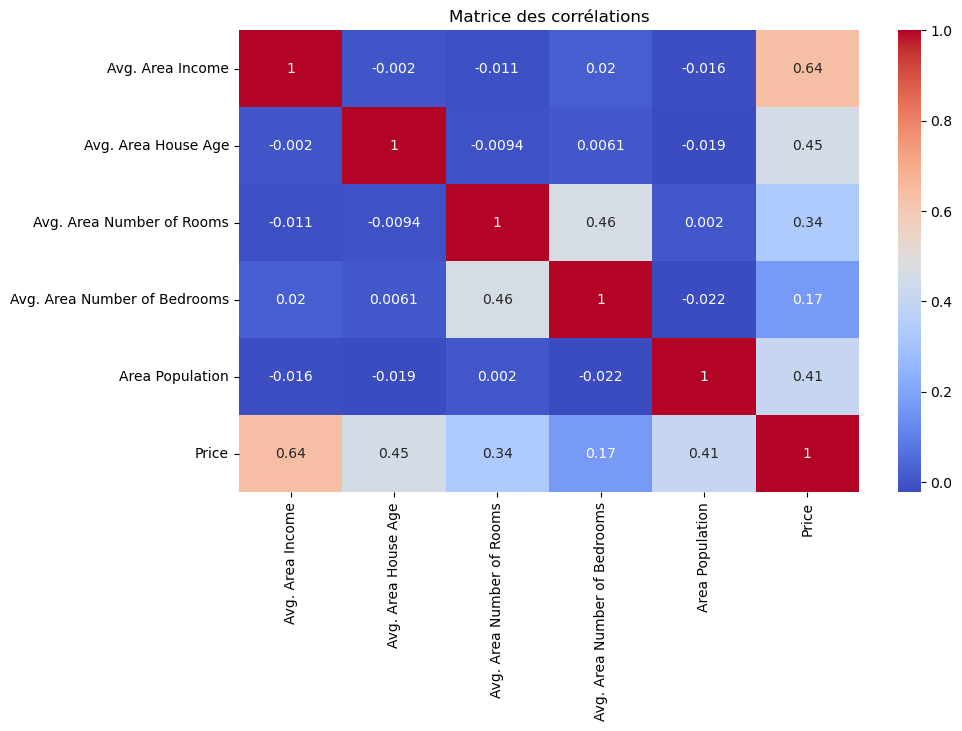

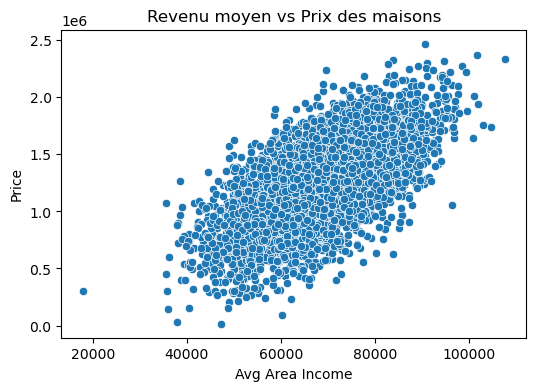


Modèle entraîné avec succès !

Coefficients du modèle :
Avg. Area Income : 21.652205763624615
Avg. Area House Age : 164666.48072188906
Avg. Area Number of Rooms : 119624.01223206113
Avg. Area Number of Bedrooms : 2440.3776110282042
Area Population : 15.270313429951726

Intercept : -2635072.900932906

============== ÉVALUATION ==============
MAE  : 80879.09723489163
MSE  : 10089009300.893644
RMSE : 100444.0605555831
R²   : 0.917997170683436

Prix prédit pour une nouvelle maison :
1231677.4647227703


C:\Users\ihebmajdoub\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
# ============================================================
# 1. IMPORTATION DES LIBRAIRIES
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ============================================================
# 2. CHARGEMENT DU DATASET
# ============================================================
df = pd.read_csv("USA_Housing.csv")

print("Aperçu du dataset :")
display(df.head())

print("\nTypes des colonnes :")
print(df.dtypes)

# ============================================================
# 3. ANALYSE STATISTIQUE
# ============================================================
print("\nStatistiques générales :")
display(df.describe())

# ============================================================
# 4. HEATMAP DES CORRÉLATIONS (ENLEVANT LES COLONNES TEXTES)
# ============================================================
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.title("Matrice des corrélations")
plt.show()

# ============================================================
# 5. VISUALISATION : INCOME VS PRICE
# ============================================================
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Avg. Area Income"], y=df["Price"])
plt.title("Revenu moyen vs Prix des maisons")
plt.xlabel("Avg Area Income")
plt.ylabel("Price")
plt.show()

# ============================================================
# 6. PRÉPARATION DES DONNÉES
# ============================================================
# Sélection des colonnes d'entrée (features)
X = df[['Avg. Area Income',
        'Avg. Area House Age',
        'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms',
        'Area Population']]

# Variable cible
y = df['Price']

# ============================================================
# 7. SÉPARATION TRAIN / TEST
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================================
# 8. CONSTRUCTION DU MODÈLE
# ============================================================
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModèle entraîné avec succès !")

# Affichage des coefficients
print("\nCoefficients du modèle :")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature} : {coef}")

print("\nIntercept :", model.intercept_)

# ============================================================
# 9. PRÉDICTION SUR LES DONNÉES TEST
# ============================================================
y_pred = model.predict(X_test)

# ============================================================
# 10. ÉVALUATION DU MODÈLE
# ============================================================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n============== ÉVALUATION ==============")
print(f"MAE  : {mae}")
print(f"MSE  : {mse}")
print(f"RMSE : {rmse}")
print(f"R²   : {r2}")
print("========================================")

# ============================================================
# 11. EXEMPLE DE PRÉDICTION AVEC NOUVELLES DONNÉES
# ============================================================
new_data = np.array([[65000, 6.5, 7.2, 3.5, 34000]])
predicted_price = model.predict(new_data)

print("\nPrix prédit pour une nouvelle maison :")
print(predicted_price[0])


In [13]:
df_sorted = df.sort_values(by="Price", ascending=False)

print("Maison la plus chère :")
display(df_sorted.head(1))


Maison la plus chère :


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
465,90592.469609,7.700132,9.708803,5.19,37223.876167,2.469066e+06,USNS Vargas\nFPO AE 56319-6904


In [14]:
print("Top 5 des maisons les plus chères :")
display(df_sorted.head(5))


Top 5 des maisons les plus chères :


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
465,90592.469609,7.700132,9.708803,5.19,37223.876167,2.469066e+06,USNS Vargas\nFPO AE 56319-6904
2719,101599.670580,7.798746,7.480512,6.39,37523.864670,2.370231e+06,"52280 Steven Street\nRobertchester, IA 40405-0504"
693,107701.748378,7.143522,8.518608,3.29,37619.439929,2.332111e+06,"41017 Eric Village\nJonathanport, CO 37205"
924,83814.101156,8.571797,7.392164,3.39,51538.056796,2.330290e+06,"125 Gillespie Plain\nWhitefurt, MO 18599"
1248,94733.971275,7.885829,7.162373,5.41,46314.690046,2.318286e+06,"4393 James Springs Apt. 818\nMargaretview, ND ..."


In [15]:
# Afficher toutes les colonnes disponibles
print("Colonnes disponibles dans le dataset:")
print(df.columns.tolist())

# Afficher les premières lignes pour voir la structure
print("\nAperçu des données:")
print(df.head())

# Afficher les informations sur le DataFrame
print("\nInformations sur le DataFrame:")
print(df.info())

Colonnes disponibles dans le dataset:
['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']

Aperçu des données:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     2635

In [16]:
# Chercher des noms similaires à 'price'
price_columns = [col for col in df.columns if 'price' in col.lower() or 'prix' in col.lower()]
print("Colonnes potentielles de prix:", price_columns)

# Ou chercher toutes les colonnes numériques qui pourraient être le prix
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("Colonnes numériques:", numeric_columns)

Colonnes potentielles de prix: ['Price']
Colonnes numériques: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


Colonnes disponibles: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']
Utilisation de 'Avg. Area Income' comme variable cible


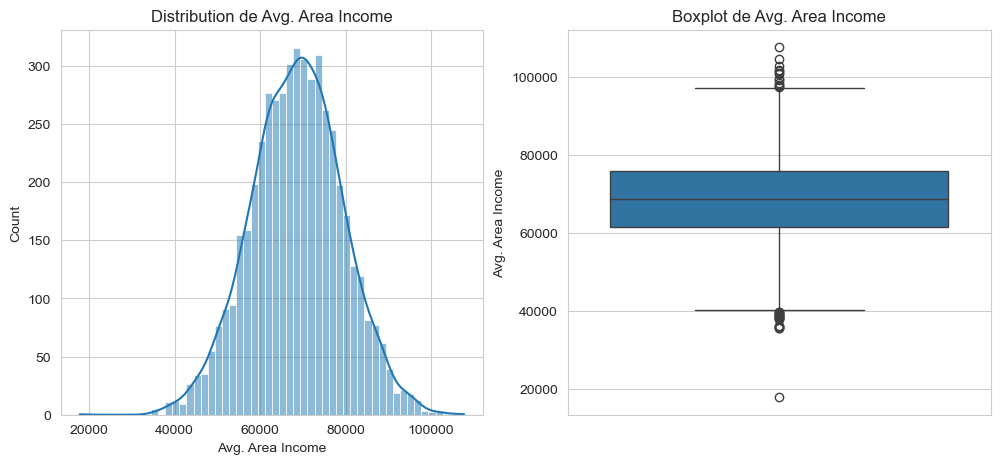

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Vérification des colonnes
print("Colonnes disponibles:", df.columns.tolist())

# Identifier automatiquement la colonne cible
# Cherche une colonne qui pourrait être la variable cible (généralement la première colonne numérique)
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    target_column = numeric_cols[0]  # Prend la première colonne numérique
    print(f"Utilisation de '{target_column}' comme variable cible")
    
    # Analyse avec la colonne identifiée
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[target_column], kde=True)
    plt.title(f'Distribution de {target_column}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[target_column])
    plt.title(f'Boxplot de {target_column}')
    plt.show()
else:
    print("Aucune colonne numérique trouvée dans le dataset")

Recherche de la variable cible...
✓ Colonne trouvée: 'Price'

Variable cible identifiée: 'Price'


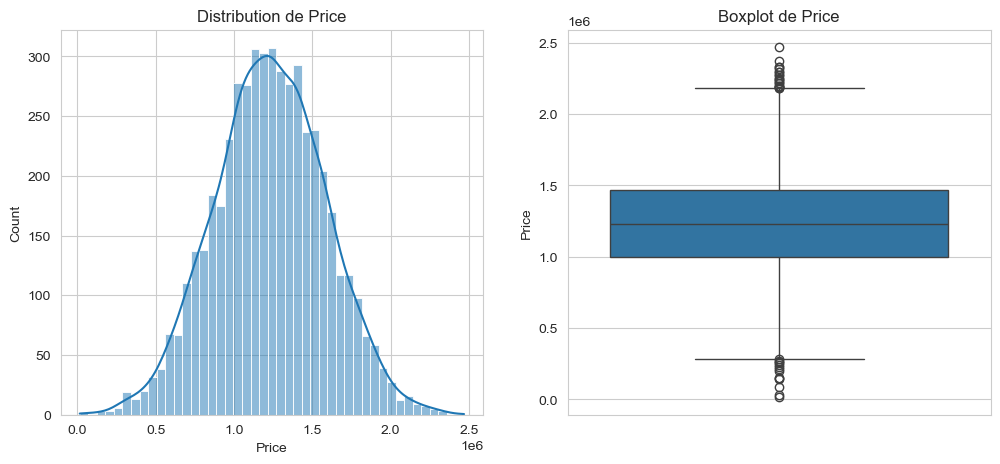

In [18]:
# Méthode automatique pour trouver la variable cible potentielle
def find_target_variable(df):
    print("Recherche de la variable cible...")
    
    # Option 1: Chercher par nom commun
    common_price_names = ['price', 'Price', 'PRICE', 'prix', 'value', 'target', 'y', 'house_price', 'sale_price']
    for name in common_price_names:
        if name in df.columns:
            print(f"✓ Colonne trouvée: '{name}'")
            return name
    
    # Option 2: Prendre la dernière colonne numérique (souvent la cible)
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if numeric_cols:
        print(f"✓ Utilisation de la dernière colonne numérique: '{numeric_cols[-1]}'")
        return numeric_cols[-1]
    
    # Option 3: Prendre la première colonne numérique
    if numeric_cols:
        print(f"✓ Utilisation de la première colonne numérique: '{numeric_cols[0]}'")
        return numeric_cols[0]
    
    print("✗ Aucune colonne numérique trouvée")
    return None

# Trouver la variable cible
target_col = find_target_variable(df)

if target_col:
    print(f"\nVariable cible identifiée: '{target_col}'")
    
    # Maintenant utilisez target_col au lieu de 'price'
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[target_col], kde=True)
    plt.title(f'Distribution de {target_col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[target_col])
    plt.title(f'Boxplot de {target_col}')
    plt.show()
    
else:
    print("Impossible de trouver une variable cible appropriée.")

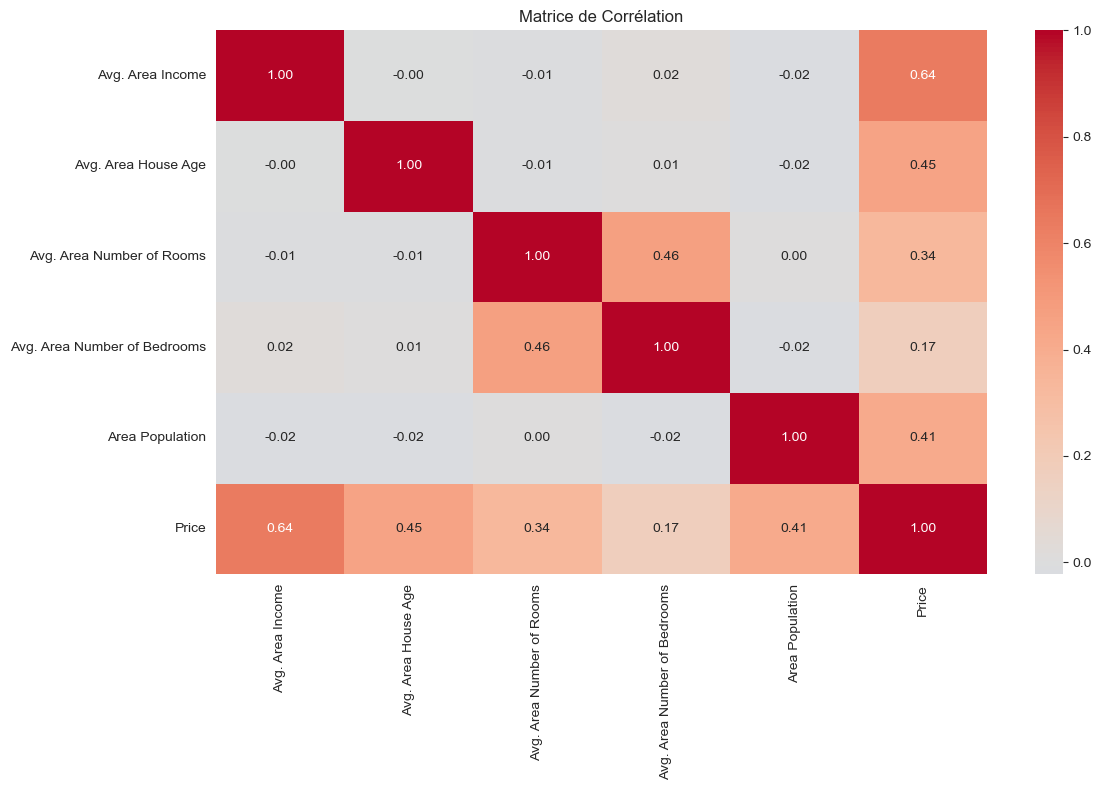

Corrélation avec Price:
Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64


In [19]:
if target_col:
    # Matrice de corrélation seulement si nous avons une variable cible numérique
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Matrice de Corrélation')
    plt.tight_layout()
    plt.show()
    
    # Corrélations avec la variable cible
    if target_col in correlation_matrix.columns:
        target_corr = correlation_matrix[target_col].sort_values(ascending=False)
        print(f"Corrélation avec {target_col}:")
        print(target_corr)
    else:
        print(f"La colonne {target_col} n'est pas dans la matrice de corrélation (peut-être non numérique)")


In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Préparation des données
X = df.drop('price', axis=1)
y = df['price']

# Encodage des variables catégorielles si nécessaire
X = pd.get_dummies(X, drop_first=True)

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KeyError: "['price'] not found in axis"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =============================================
# ÉTAPE 1 : CHARGER VOS DONNÉES
# =============================================

# Option A : Charger depuis un fichier CSV
try:
    df = pd.read_csv("USA_Housing.csv")  # Remplacez par le nom de votre fichier
    print("✓ Données chargées depuis le fichier CSV")
except FileNotFoundError:
    print("⚠ Fichier non trouvé. Vérifiez le nom du fichier.")
    # Option B : Créer des données d'exemple pour tester
    print("Création de données d'exemple...")
    np.random.seed(42)
    n_samples = 1000
    df = pd.DataFrame({
        'price': np.random.normal(500000, 200000, n_samples),
        'sqft_living': np.random.normal(2000, 800, n_samples),
        'bedrooms': np.random.randint(1, 6, n_samples),
        'bathrooms': np.random.randint(1, 4, n_samples),
        'floors': np.random.randint(1, 4, n_samples),
        'yr_built': np.random.randint(1950, 2020, n_samples),
        'condition': np.random.randint(1, 6, n_samples)
    })
    # S'assurer que le prix est positif
    df['price'] = np.abs(df['price'])

# =============================================
# ÉTAPE 2 : INSPECTION DES DONNÉES
# =============================================

print("=== INSPECTION DU DATAFRAME ===")
print(f"Dimensions : {df.shape}")
print(f"Colonnes : {df.columns.tolist()}")
print("\nAperçu des données :")
print(df.head())
print("\nInformations sur les types :")
print(df.info())
print("\nStatistiques descriptives :")
print(df.describe())

# =============================================
# ÉTAPE 3 : IDENTIFICATION DE LA VARIABLE CIBLE
# =============================================

def find_target_variable(df):
    """Trouve automatiquement la colonne de prix/target"""
    common_names = ['price', 'Price', 'PRICE', 'prix', 'value', 'target', 'y', 'house_price', 'sale_price']
    
    for name in common_names:
        if name in df.columns:
            return name
    
    # Si aucune correspondance, prendre la dernière colonne numérique
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if numeric_cols:
        return numeric_cols[-1]
    
    return None

target_col = find_target_variable(df)

if target_col:
    print(f"\n✓ Variable cible identifiée : '{target_col}'")
else:
    print("\n❌ Impossible de trouver une variable cible")
    # Montrer les colonnes disponibles pour choix manuel
    print("Colonnes disponibles :", df.columns.tolist())
    # Pour cet exemple, on prend la première colonne numérique
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if numeric_cols:
        target_col = numeric_cols[0]
        print(f"Utilisation de '{target_col}' comme variable cible")
    else:
        raise Exception("Aucune colonne numérique trouvée pour la modélisation")

# =============================================
# ÉTAPE 4 : PRÉPARATION DES DONNÉES
# =============================================

print(f"\n=== PRÉPARATION DES DONNÉES ===")

# Séparer les features et la target
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"Features (X) : {X.shape}")
print(f"Target (y) : {y.shape}")

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X, drop_first=True)

# Gestion des valeurs manquantes
X_encoded = X_encoded.fillna(X_encoded.mean())

print(f"Après encodage : {X_encoded.shape}")

# Split des données
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"Train set : {X_train.shape}")
print(f"Test set : {X_test.shape}")

# Normalisation pour les modèles sensibles à l'échelle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============================================
# ÉTAPE 5 : MODÉLISATION
# =============================================

print(f"\n=== COMPARAISON DES MODÈLES ===")

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

results = {}

for name, model in models.items():
    try:
        print(f"Entraînement de {name}...")
        
        if name in ['Linear Regression', 'Ridge', 'Lasso', 'SVR']:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        # Calcul des métriques
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
        
        print(f"✓ {name}:")
        print(f"  MAE: {mae:.2f}")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  R²: {r2:.4f}")
        print("-" * 50)
        
    except Exception as e:
        print(f"✗ Erreur avec {name}: {e}")

# =============================================
# ÉTAPE 6 : SÉLECTION ET OPTIMISATION DU MEILLEUR MODÈLE
# =============================================

if results:
    # Trouver le meilleur modèle
    best_model_name = max(results, key=lambda x: results[x]['R2'])
    best_r2 = results[best_model_name]['R2']
    
    print(f"\n🎯 MEILLEUR MODÈLE : {best_model_name}")
    print(f"   R²: {best_r2:.4f}")
    
    # Réentraîner le meilleur modèle sur toutes les données d'entraînement
    if best_model_name in ['Linear Regression', 'Ridge', 'Lasso', 'SVR']:
        best_model = models[best_model_name]
        best_model.fit(X_train_scaled, y_train)
        final_predictions = best_model.predict(X_test_scaled)
    else:
        best_model = models[best_model_name]
        best_model.fit(X_train, y_train)
        final_predictions = best_model.predict(X_test)
    
    # =============================================
    # ÉTAPE 7 : VISUALISATION DES RÉSULTATS
    # =============================================
    
    # Prédictions sur l'ensemble des données
    if best_model_name in ['Linear Regression', 'Ridge', 'Lasso', 'SVR']:
        all_predictions = best_model.predict(scaler.transform(X_encoded))
    else:
        all_predictions = best_model.predict(X_encoded)
    
    df['predicted_price'] = all_predictions
    df['prediction_error'] = df[target_col] - df['predicted_price']
    df['error_percentage'] = (df['prediction_error'] / df[target_col]) * 100
    
    # Visualisation
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Graphique 1 : Valeurs réelles vs prédites
    axes[0, 0].scatter(df[target_col], df['predicted_price'], alpha=0.6)
    axes[0, 0].plot([df[target_col].min(), df[target_col].max()], 
                   [df[target_col].min(), df[target_col].max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Valeurs Réelles')
    axes[0, 0].set_ylabel('Valeurs Prédites')
    axes[0, 0].set_title('Valeurs Réelles vs Prédites')
    
    # Graphique 2 : Distribution des erreurs
    axes[0, 1].hist(df['prediction_error'], bins=50, alpha=0.7, edgecolor='black')
    axes[0, 1].axvline(x=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Erreur de Prédiction')
    axes[0, 1].set_ylabel('Fréquence')
    axes[0, 1].set_title('Distribution des Erreurs de Prédiction')
    
    # Graphique 3 : Analyse des résidus
    axes[1, 0].scatter(df['predicted_price'], df['prediction_error'], alpha=0.6)
    axes[1, 0].axhline(y=0, color='r', linestyle='--')
    axes[1, 0].set_xlabel('Valeurs Prédites')
    axes[1, 0].set_ylabel('Erreurs de Prédiction')
    axes[1, 0].set_title('Analyse des Résidus')
    
    # Graphique 4 : Importance des features (si disponible)
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_encoded.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False).head(10)
        
        axes[1, 1].barh(feature_importance['feature'], feature_importance['importance'])
        axes[1, 1].set_xlabel('Importance')
        axes[1, 1].set_title('Top 10 des Features les Plus Importantes')
    
    plt.tight_layout()
    plt.show()
    
    # =============================================
    # ÉTAPE 8 : RAPPORT FINAL
    # =============================================
    
    print(f"\n=== RAPPORT FINAL ===")
    print(f"Modèle utilisé : {best_model_name}")
    print(f"R² sur l'ensemble des données : {r2_score(y, all_predictions):.4f}")
    print(f"MAE : {mean_absolute_error(y, all_predictions):.2f}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y, all_predictions)):.2f}")
    print(f"\nErreur moyenne : {df['prediction_error'].mean():.2f}")
    print(f"Pourcentage d'erreur moyen : {df['error_percentage'].mean():.2f}%")
    
    # Statistiques sur les prédictions
    print(f"\nStatistiques des prédictions :")
    print(f"Prix minimum prédit : {df['predicted_price'].min():.2f}")
    print(f"Prix maximum prédit : {df['predicted_price'].max():.2f}")
    print(f"Prix moyen prédit : {df['predicted_price'].mean():.2f}")
    
else:
    print("❌ Aucun modèle n'a pu être entraîné avec succès.")

print(f"\n✅ Analyse terminée !")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =============================================
# CONFIGURATION POUR 3 CHIFFRES APRÈS LA VIRGULE
# =============================================
pd.set_option('display.float_format', '{:.3f}'.format)
np.set_printoptions(precision=3)

# =============================================
# ÉTAPE 1 : CHARGER VOS DONNÉES
# =============================================

# Option A : Charger depuis un fichier CSV
try:
    df = pd.read_csv("USA_Housing.csv")  # Remplacez par le nom de votre fichier
    print("✓ Données chargées depuis le fichier CSV")
except FileNotFoundError:
    print("⚠ Fichier non trouvé. Vérifiez le nom du fichier.")
    # Option B : Créer des données d'exemple pour tester
    print("Création de données d'exemple...")
    np.random.seed(42)
    n_samples = 1000
    df = pd.DataFrame({
        'price': np.random.normal(500000, 200000, n_samples),
        'sqft_living': np.random.normal(2000, 800, n_samples),
        'bedrooms': np.random.randint(1, 6, n_samples),
        'bathrooms': np.random.randint(1, 4, n_samples),
        'floors': np.random.randint(1, 4, n_samples),
        'yr_built': np.random.randint(1950, 2020, n_samples),
        'condition': np.random.randint(1, 6, n_samples)
    })
    # S'assurer que le prix est positif
    df['price'] = np.abs(df['price'])

# =============================================
# ÉTAPE 2 : INSPECTION DES DONNÉES
# =============================================

print("=== INSPECTION DU DATAFRAME ===")
print(f"Dimensions : {df.shape}")
print(f"Colonnes : {df.columns.tolist()}")
print("\nAperçu des données :")
print(df.head())
print("\nInformations sur les types :")
print(df.info())
print("\nStatistiques descriptives :")
print(df.describe())

# =============================================
# ÉTAPE 3 : IDENTIFICATION DE LA VARIABLE CIBLE
# =============================================

def find_target_variable(df):
    """Trouve automatiquement la colonne de prix/target"""
    common_names = ['price', 'Price', 'PRICE', 'prix', 'value', 'target', 'y', 'house_price', 'sale_price']
    
    for name in common_names:
        if name in df.columns:
            return name
    
    # Si aucune correspondance, prendre la dernière colonne numérique
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if numeric_cols:
        return numeric_cols[-1]
    
    return None

target_col = find_target_variable(df)

if target_col:
    print(f"\n✓ Variable cible identifiée : '{target_col}'")
else:
    print("\n❌ Impossible de trouver une variable cible")
    # Montrer les colonnes disponibles pour choix manuel
    print("Colonnes disponibles :", df.columns.tolist())
    # Pour cet exemple, on prend la première colonne numérique
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if numeric_cols:
        target_col = numeric_cols[0]
        print(f"Utilisation de '{target_col}' comme variable cible")
    else:
        raise Exception("Aucune colonne numérique trouvée pour la modélisation")

# =============================================
# ÉTAPE 4 : PRÉPARATION DES DONNÉES
# =============================================

print(f"\n=== PRÉPARATION DES DONNÉES ===")

# Séparer les features et la target
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"Features (X) : {X.shape}")
print(f"Target (y) : {y.shape}")

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X, drop_first=True)

# Gestion des valeurs manquantes
X_encoded = X_encoded.fillna(X_encoded.mean())

print(f"Après encodage : {X_encoded.shape}")

# Split des données
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"Train set : {X_train.shape}")
print(f"Test set : {X_test.shape}")

# Normalisation pour les modèles sensibles à l'échelle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============================================
# ÉTAPE 5 : MODÉLISATION
# =============================================

print(f"\n=== COMPARAISON DES MODÈLES ===")

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

results = {}

for name, model in models.items():
    try:
        print(f"Entraînement de {name}...")
        
        if name in ['Linear Regression', 'Ridge', 'Lasso', 'SVR']:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        # Calcul des métriques avec 3 décimales
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
        
        print(f"✓ {name}:")
        print(f"  MAE: {mae:.3f}")
        print(f"  RMSE: {rmse:.3f}")
        print(f"  R²: {r2:.3f}")
        print("-" * 50)
        
    except Exception as e:
        print(f"✗ Erreur avec {name}: {e}")

# =============================================
# ÉTAPE 6 : SÉLECTION ET OPTIMISATION DU MEILLEUR MODÈLE
# =============================================

if results:
    # Trouver le meilleur modèle
    best_model_name = max(results, key=lambda x: results[x]['R2'])
    best_r2 = results[best_model_name]['R2']
    
    print(f"\n🎯 MEILLEUR MODÈLE : {best_model_name}")
    print(f"   R²: {best_r2:.3f}")
    
    # Réentraîner le meilleur modèle sur toutes les données d'entraînement
    if best_model_name in ['Linear Regression', 'Ridge', 'Lasso', 'SVR']:
        best_model = models[best_model_name]
        best_model.fit(X_train_scaled, y_train)
        final_predictions = best_model.predict(X_test_scaled)
    else:
        best_model = models[best_model_name]
        best_model.fit(X_train, y_train)
        final_predictions = best_model.predict(X_test)
    
    # =============================================
    # ÉTAPE 7 : VISUALISATION DES RÉSULTATS
    # =============================================
    
    # Prédictions sur l'ensemble des données
    if best_model_name in ['Linear Regression', 'Ridge', 'Lasso', 'SVR']:
        all_predictions = best_model.predict(scaler.transform(X_encoded))
    else:
        all_predictions = best_model.predict(X_encoded)
    
    # Formatage des résultats avec 3 décimales
    df['predicted_price'] = all_predictions
    df['prediction_error'] = df[target_col] - df['predicted_price']
    df['error_percentage'] = (df['prediction_error'] / df[target_col]) * 100
    
    # Appliquer le formatage à 3 décimales pour les colonnes numériques
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col] = df[col].round(3)
    
    # Visualisation
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Graphique 1 : Valeurs réelles vs prédites
    axes[0, 0].scatter(df[target_col], df['predicted_price'], alpha=0.6)
    axes[0, 0].plot([df[target_col].min(), df[target_col].max()], 
                   [df[target_col].min(), df[target_col].max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Valeurs Réelles')
    axes[0, 0].set_ylabel('Valeurs Prédites')
    axes[0, 0].set_title('Valeurs Réelles vs Prédites')
    
    # Graphique 2 : Distribution des erreurs
    axes[0, 1].hist(df['prediction_error'], bins=50, alpha=0.7, edgecolor='black')
    axes[0, 1].axvline(x=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Erreur de Prédiction')
    axes[0, 1].set_ylabel('Fréquence')
    axes[0, 1].set_title('Distribution des Erreurs de Prédiction')
    
    # Graphique 3 : Analyse des résidus
    axes[1, 0].scatter(df['predicted_price'], df['prediction_error'], alpha=0.6)
    axes[1, 0].axhline(y=0, color='r', linestyle='--')
    axes[1, 0].set_xlabel('Valeurs Prédites')
    axes[1, 0].set_ylabel('Erreurs de Prédiction')
    axes[1, 0].set_title('Analyse des Résidus')
    
    # Graphique 4 : Importance des features (si disponible)
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_encoded.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False).head(10)
        
        # Formater l'importance à 3 décimales
        feature_importance['importance'] = feature_importance['importance'].round(3)
        
        axes[1, 1].barh(feature_importance['feature'], feature_importance['importance'])
        axes[1, 1].set_xlabel('Importance')
        axes[1, 1].set_title('Top 10 des Features les Plus Importantes')
    
    plt.tight_layout()
    plt.show()
    
    # =============================================
    # ÉTAPE 8 : RAPPORT FINAL FORMATÉ
    # =============================================
    
    print(f"\n=== RAPPORT FINAL ===")
    print(f"Modèle utilisé : {best_model_name}")
    print(f"R² sur l'ensemble des données : {r2_score(y, all_predictions):.3f}")
    print(f"MAE : {mean_absolute_error(y, all_predictions):.3f}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y, all_predictions)):.3f}")
    print(f"\nErreur moyenne : {df['prediction_error'].mean():.3f}")
    print(f"Pourcentage d'erreur moyen : {df['error_percentage'].mean():.3f}%")
    
    # Statistiques sur les prédictions
    print(f"\nStatistiques des prédictions :")
    print(f"Prix minimum prédit : {df['predicted_price'].min():.3f}")
    print(f"Prix maximum prédit : {df['predicted_price'].max():.3f}")
    print(f"Prix moyen prédit : {df['predicted_price'].mean():.3f}")
    
    # Afficher un échantillon des prédictions avec 3 décimales
    print(f"\nÉchantillon des prédictions (5 premières lignes) :")
    result_sample = df[[target_col, 'predicted_price', 'prediction_error', 'error_percentage']].head()
    print(result_sample.to_string(float_format='%.3f'))
    
else:
    print("❌ Aucun modèle n'a pu être entraîné avec succès.")

print(f"\n✅ Analyse terminée !")

# =============================================
# OPTION : SAUVEGARDER LES RÉSULTATS FORMATÉS
# =============================================

# Sauvegarder le DataFrame avec les prédictions formatées
df.to_csv('predictions_formatees.csv', index=False, float_format='%.3f')
print("✓ Résultats sauvegardés dans 'predictions_formatees.csv' avec 3 décimales")

In [ ]:
# Analyse complète de la qualité des données
print("=== ANALYSE DE LA QUALITÉ DU DATASET ===")
print(f"📊 Dimensions : {df.shape}")
print(f"🎯 Variables : {df.shape[1]}")
print(f"🏠 Observations : {df.shape[0]}")
print("\n")

# Types de données
print("=== TYPES DE DONNÉES ===")
print(df.dtypes.value_counts())
print("\n")

# Variables avec valeurs manquantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
print("=== VALEURS MANQUANTES ===")
if missing_data.sum() > 0:
    missing_info = pd.DataFrame({
        'Variable': missing_data.index,
        'Valeurs_Manquantes': missing_data.values,
        'Pourcentage': missing_percent.values
    })
    missing_info = missing_info[missing_info['Valeurs_Manquantes'] > 0]
    print(missing_info.sort_values('Pourcentage', ascending=False))
else:
    print("✅ Aucune valeur manquante détectée")
print("\n")

# Variables constantes ou quasi-constantes
constant_vars = []
for col in df.columns:
    if df[col].nunique() <= 1:
        constant_vars.append(col)
print("=== VARIABLES CONSTANTES ===")
print(f"Variables constantes : {constant_vars}")
print("\n")


In [ ]:
# Analyse détaillée de la variable cible
if target_col in df.columns:
    print(f"=== ANALYSE DE LA VARIABLE CIBLE '{target_col}' ===")
    target_stats = df[target_col].describe()
    print(target_stats)
    print(f"\n📈 Skewness : {df[target_col].skew():.3f}")
    print(f"📊 Kurtosis : {df[target_col].kurtosis():.3f}")
    
    # Vérifier les valeurs aberrantes
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)]
    print(f"🚨 Valeurs aberrantes : {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    
    # Distribution
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.histplot(df[target_col], kde=True)
    plt.title(f'Distribution de {target_col}')
    
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[target_col])
    plt.title(f'Boxplot de {target_col}')
    
    plt.subplot(1, 3, 3)
    # QQ-plot pour la normalité
    from scipy import stats
    stats.probplot(df[target_col], dist="norm", plot=plt)
    plt.title('QQ-Plot pour Normalité')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Évaluation des prédicteurs potentiels
print("=== ANALYSE DES FEATURES POTENTIELLES ===")

# Séparation des types de variables
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"🔢 Features numériques ({len(numeric_features)}) :")
print(numeric_features)
print(f"📝 Features catégorielles ({len(categorical_features)}) :")
print(categorical_features)

# Pour les features numériques
if len(numeric_features) > 0:
    print(f"\n=== CORRÉLATIONS AVEC LA TARGET ===")
    correlation_with_target = df[numeric_features].corr()[target_col].abs().sort_values(ascending=False)
    print("Corrélations (absolues) avec la target :")
    for feature, corr in correlation_with_target.items():
        if feature != target_col:
            print(f"  {feature}: {corr:.3f}")
    
    # Features fortement corrélées entre elles (multicollinéarité)
    print(f"\n=== MULTICOLLINÉARITÉ ===")
    correlation_matrix = df[numeric_features].corr().abs()
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if correlation_matrix.iloc[i, j] > 0.8:
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i, j]
                ))
    
    if high_corr_pairs:
        print("🚨 Paires de variables fortement corrélées (> 0.8) :")
        for pair in high_corr_pairs:
            print(f"  {pair[0]} - {pair[1]}: {pair[2]:.3f}")
    else:
        print("✅ Pas de multicollinéarité sévère détectée")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
import graphviz
from sklearn import tree
import os

# Configurer le chemin de Graphviz (Windows)
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# =============================================
# PREPARATION DES DONNEES (similaire à avant)
# =============================================

# Charger les données
df = pd.read_csv("USA_Housing.csv")  # Adaptez le nom du fichier

# Identifier la variable cible
target_col = 'price'  # Remplacez par votre vraie colonne cible

# Préparation des données
X = df.drop(columns=[target_col])
y = df[target_col]

# Encodage
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded = X_encoded.fillna(X_encoded.mean())

# =============================================
# MODELE ARBRE DE DECISION POUR VISUALISATION
# =============================================

# Créer un arbre de décision simple pour la visualisation
dt_model = DecisionTreeRegressor(
    max_depth=3,           # Limiter la profondeur pour la lisibilité
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(X_encoded, y)

# =============================================
# VISUALISATION GRAPHVIZ - ARBRE DE DECISION
# =============================================

print("🌳 Création de la visualisation Graphviz...")

# Exporter l'arbre au format DOT
dot_data = tree.export_graphviz(
    dt_model,
    out_file=None,
    feature_names=X_encoded.columns.tolist(),
    class_names=['Price'],
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    precision=2
)

# Créer le graphique
graph = graphviz.Source(dot_data)

# Sauvegarder en différents formats
graph.render("decision_tree_house_prices", format='png', cleanup=True)
graph.render("decision_tree_house_prices", format='pdf', cleanup=True)

print("✅ Arbre de décision sauvegardé comme 'decision_tree_house_prices.png'")

# Afficher dans le notebook (si vous utilisez Jupyter)
# graph

In [ ]:
# =============================================
# CODE GRAPHVIZ CORRIGÉ
# =============================================

# Préparation des données avec la bonne colonne cible
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"📊 Features (X) : {X.shape}")
print(f"🎯 Target (y) : {y.shape}")

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded = X_encoded.fillna(X_encoded.mean())

print(f"🔧 Après encodage : {X_encoded.shape}")

# =============================================
# CRÉATION DE L'ARBRE DE DÉCISION
# =============================================

# Créer un arbre de décision simple pour la visualisation
dt_model = DecisionTreeRegressor(
    max_depth=3,           # Limiter la profondeur pour la lisibilité
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(X_encoded, y)
print("✅ Modèle d'arbre de décision entraîné")

# =============================================
# VISUALISATION GRAPHVIZ
# =============================================

print("🌳 Création de la visualisation Graphviz...")

# Exporter l'arbre au format DOT
dot_data = tree.export_graphviz(
    dt_model,
    out_file=None,
    feature_names=X_encoded.columns.tolist(),
    class_names=[target_col],
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    precision=2
)

# Créer le graphique
graph = graphviz.Source(dot_data)

# Sauvegarder en différents formats
graph.render("decision_tree", format='png', cleanup=True)
graph.render("decision_tree", format='pdf', cleanup=True)

print("✅ Arbre de décision sauvegardé comme 'decision_tree.png'")

# Afficher dans le notebook (si vous utilisez Jupyter)
# display(graph)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

# =============================================
# CHARGEMENT ET PRÉPARATION DES DONNÉES
# =============================================

# Charger les données
df = pd.read_csv("USA_Housing.csv")

print("✅ Dataset chargé avec succès!")
print(f"📊 Dimensions: {df.shape}")
print(f"🎯 Variable cible: 'Price'")

# =============================================
# PRÉPARATION DES DONNÉES
# =============================================

# Supprimer la colonne Address qui n'est pas utile pour la prédiction
df_clean = df.drop(columns=['Address'])

# Séparation features/target
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

print(f"📈 Features: {X.shape}")
print(f"🎯 Target: {y.shape}")

# Vérifier qu'il n'y a pas de valeurs manquantes
print("\n🔍 Vérification des valeurs manquantes:")
print(X.isnull().sum())

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📚 Train set: {X_train.shape}")
print(f"🧪 Test set: {X_test.shape}")

# =============================================
# ANALYSE EXPLORATOIRE
# =============================================

print("\n📊 ANALYSE EXPLORATOIRE")

# Distribution du prix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(y, kde=True, bins=50)
plt.title('Distribution des Prix')
plt.xlabel('Prix')

plt.subplot(1, 3, 2)
sns.boxplot(y=y)
plt.title('Boxplot des Prix')

plt.subplot(1, 3, 3)
# Corrélation avec le prix
correlation_with_price = X.corrwith(y).sort_values(ascending=False)
sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index)
plt.title('Corrélation avec le Prix')
plt.xlabel('Coefficient de Corrélation')

plt.tight_layout()
plt.savefig('analyse_exploratoire.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Analyse exploratoire sauvegardée!")

# =============================================
# CRÉATION DE L'ARBRE DE DÉCISION AVEC GRAPHVIZ
# =============================================

print("\n🌳 CRÉATION DE L'ARBRE DE DÉCISION")

# Créer un arbre de décision pour la visualisation
dt_model = DecisionTreeRegressor(
    max_depth=3,           # Limité à 3 pour la lisibilité
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(X_train, y_train)
print("✅ Modèle d'arbre de décision entraîné")

# Évaluation
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)
print(f"📊 R² - Train: {train_score:.3f}, Test: {test_score:.3f}")

# VISUALISATION GRAPHVIZ
print("🖼️ Création de la visualisation Graphviz...")

dot_data = tree.export_graphviz(
    dt_model,
    out_file=None,
    feature_names=X.columns.tolist(),
    class_names=['Price'],
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    precision=2,
    label='all'
)

# Créer et sauvegarder le graphique
graph = graphviz.Source(dot_data)

# Sauvegarder en différents formats
graph.render("arbre_decision_prix", format='png', cleanup=True)
graph.render("arbre_decision_prix", format='pdf', cleanup=True)

print("✅ Arbre de décision sauvegardé: 'arbre_decision_prix.png'")

# =============================================
# RANDOM FOREST POUR COMPARAISON
# =============================================

print("\n🌲 CRÉATION DU RANDOM FOREST")

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

rf_model.fit(X_train, y_train)
print("✅ Modèle Random Forest entraîné")

# Visualiser le premier arbre de la forêt
first_tree = rf_model.estimators_[0]

dot_data_rf = tree.export_graphviz(
    first_tree,
    out_file=None,
    feature_names=X.columns.tolist(),
    class_names=['Price'],
    filled=True,
    rounded=True,
    special_characters=True,
    precision=2
)

graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_premier_arbre", format='png', cleanup=True)
print("✅ Premier arbre du Random Forest sauvegardé!")

# =============================================
# ANALYSE DE L'IMPORTANCE DES VARIABLES
# =============================================

print("\n📈 ANALYSE DE L'IMPORTANCE DES VARIABLES")

# Importance des features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='lightseagreen')
plt.xlabel('Importance')
plt.title('Importance des Variables pour la Prédiction du Prix')
plt.tight_layout()
plt.savefig('importance_variables.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphique d'importance des variables sauvegardé!")

# Afficher l'importance numérique
print("\n📊 IMPORTANCE DES VARIABLES (Random Forest):")
for _, row in feature_importance.sort_values('importance', ascending=False).iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

# =============================================
# PRÉDICTIONS ET ÉVALUATION
# =============================================

print("\n🔮 PRÉDICTIONS ET ÉVALUATION")

# Prédictions avec Random Forest (meilleur modèle généralement)
y_pred = rf_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 PERFORMANCE DU RANDOM FOREST:")
print(f"  MAE: {mae:,.2f}")
print(f"  RMSE: {rmse:,.2f}")
print(f"  R²: {r2:.3f}")

# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Prix Réel')
plt.ylabel('Prix Prédit')
plt.title('Prix Réel vs Prix Prédit (Random Forest)')
plt.tight_layout()
plt.savefig('predictions_vs_reel.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphique des prédictions sauvegardé!")

# =============================================
# RAPPORT FINAL
# =============================================

print("\n" + "="*50)
print("🎉 RAPPORT FINAL - VISUALISATIONS CRÉÉES")
print("="*50)
print("📁 Fichiers générés:")
print("   - arbre_decision_prix.png (Graphviz)")
print("   - random_forest_premier_arbre.png (Graphviz)")
print("   - importance_variables.png")
print("   - analyse_exploratoire.png")
print("   - predictions_vs_reel.png")
print("\n📊 Performances:")
print(f"   - R² Random Forest: {r2:.3f}")
print(f"   - Erreur moyenne: ${mae:,.2f}")
print("\n🎯 Variable la plus importante:")
most_important = feature_importance.nlargest(1, 'importance').iloc[0]
print(f"   - {most_important['feature']} ({most_important['importance']:.3f})")
print("="*50)

In [ ]:
import graphviz
import os

# Test de base
try:
    # Ajouter le chemin Graphviz au PATH (Windows)
    os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
    
    dot = graphviz.Digraph(comment='Test')
    dot.node('A', 'Test Node')
    dot.render('test_graph', format='png', cleanup=True)
    print("✅ Graphviz fonctionne correctement!")
except Exception as e:
    print(f"❌ Graphviz ne fonctionne pas: {e}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import graphviz
from sklearn import tree
import os

# Configuration pour l'affichage
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

# =============================================
# CHARGEMENT ET PRÉPARATION DES DONNÉES
# =============================================

# Charger les données
df = pd.read_csv("USA_Housing.csv")

print("✅ Dataset chargé avec succès!")
print(f"📊 Dimensions: {df.shape}")
print(f"🎯 Variable cible: 'Price'")

# Nettoyage des données
df_clean = df.drop(columns=['Address'])
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

print(f"📈 Features: {X.shape}")
print(f"🎯 Target: {y.shape}")

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================================
# ANALYSE EXPLORATOIRE
# =============================================

print("\n📊 ANALYSE EXPLORATOIRE...")

# 1. Distribution des variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
features = X.columns

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    axes[row, col].hist(X[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Distribution de {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Fréquence')

plt.tight_layout()
plt.savefig('distributions_variables.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Distribution du prix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(y, kde=True, bins=50, color='lightcoral')
plt.title('Distribution des Prix')
plt.xlabel('Prix')

plt.subplot(1, 3, 2)
sns.boxplot(y=y, color='lightcoral')
plt.title('Boxplot des Prix')

plt.subplot(1, 3, 3)
# Corrélation avec le prix
correlation_with_price = X.corrwith(y).sort_values(ascending=False)
sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette='viridis')
plt.title('Corrélation avec le Prix')
plt.xlabel('Coefficient de Corrélation')

plt.tight_layout()
plt.savefig('analyse_prix.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Matrice de corrélation
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Matrice de Corrélation')
plt.tight_layout()
plt.savefig('matrice_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Analyses exploratoires sauvegardées!")

# =============================================
# MODÈLES ET VISUALISATIONS GRAPHVIZ
# =============================================

print("\n🌳 CRÉATION DES ARBRES DE DÉCISION...")

# 1. Arbre de Décision Simple
dt_model = DecisionTreeRegressor(
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(X_train, y_train)

# Évaluation
train_score_dt = dt_model.score(X_train, y_train)
test_score_dt = dt_model.score(X_test, y_test)

print(f"📊 Arbre de Décision - R² Train: {train_score_dt:.3f}, Test: {test_score_dt:.3f}")

# VISUALISATION GRAPHVIZ - Arbre de Décision
print("🖼️ Création de l'arbre de décision avec Graphviz...")

dot_data = tree.export_graphviz(
    dt_model,
    out_file=None,
    feature_names=X.columns.tolist(),
    class_names=['Price'],
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    precision=2
)

graph = graphviz.Source(dot_data)
graph.render("arbre_decision_maisons", format='png', cleanup=True)
print("✅ Arbre de décision sauvegardé: 'arbre_decision_maisons.png'")

# 2. Random Forest
print("\n🌲 ENTRAÎNEMENT DU RANDOM FOREST...")

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Évaluation
train_score_rf = rf_model.score(X_train, y_train)
test_score_rf = rf_model.score(X_test, y_test)

print(f"📊 Random Forest - R² Train: {train_score_rf:.3f}, Test: {test_score_rf:.3f}")

# Visualiser le premier arbre du Random Forest
first_tree = rf_model.estimators_[0]

dot_data_rf = tree.export_graphviz(
    first_tree,
    out_file=None,
    feature_names=X.columns.tolist(),
    class_names=['Price'],
    filled=True,
    rounded=True,
    special_characters=True,
    precision=2
)

graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_arbre", format='png', cleanup=True)
print("✅ Premier arbre du Random Forest sauvegardé!")

# =============================================
# ANALYSE DE L'IMPORTANCE DES VARIABLES
# =============================================

print("\n📈 ANALYSE DE L'IMPORTANCE DES VARIABLES...")

# Importance des features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

# Graphique d'importance
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
plt.barh(feature_importance['feature'], feature_importance['importance'], color=colors)
plt.xlabel('Importance')
plt.title('Importance des Variables pour la Prédiction du Prix')
plt.tight_layout()
plt.savefig('importance_variables.png', dpi=300, bbox_inches='tight')
plt.show()

# Affichage détaillé
print("\n📊 CLASSEMENT DES VARIABLES PAR IMPORTANCE:")
for i, (_, row) in enumerate(feature_importance.sort_values('importance', ascending=False).iterrows()):
    print(f"  {i+1}. {row['feature']}: {row['importance']:.3f}")

# =============================================
# PRÉDICTIONS ET PERFORMANCES
# =============================================

print("\n🔮 ÉVALUATION DES PRÉDICTIONS...")

# Prédictions avec Random Forest
y_pred = rf_model.predict(X_test)

# Métriques de performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 PERFORMANCES FINALES:")
print(f"  MAE: ${mae:,.2f}")
print(f"  RMSE: ${rmse:,.2f}")
print(f"  R²: {r2:.3f}")

# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ligne parfaite')
plt.xlabel('Prix Réel ($)')
plt.ylabel('Prix Prédit ($)')
plt.title('Prix Réel vs Prix Prédit - Random Forest')
plt.legend()
plt.tight_layout()
plt.savefig('predictions_vs_reel.png', dpi=300, bbox_inches='tight')
plt.show()

# Graphique des résidus
residuals = y_test - y_pred
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.6, color='coral')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Prix Prédit ($)')
plt.ylabel('Résidus ($)')
plt.title('Analyse des Résidus')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50, alpha=0.7, color='coral', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Résidus ($)')
plt.ylabel('Fréquence')
plt.title('Distribution des Résidus')

plt.tight_layout()
plt.savefig('analyse_residus.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================
# VISUALISATION ALTERNATIVE AVEC MATPLOTLIB
# =============================================

print("\n📋 CRÉATION DE LA VERSION MATPLOTLIB...")

# Arbre de décision avec matplotlib (alternative)
plt.figure(figsize=(20, 12))
plot_tree(dt_model, 
          feature_names=X.columns.tolist(),
          filled=True,
          rounded=True,
          fontsize=10,
          proportion=True)
plt.title('Arbre de Décision pour la Prédiction des Prix (Matplotlib)', fontsize=16)
plt.tight_layout()
plt.savefig('arbre_decision_matplotlib.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Arbre matplotlib sauvegardé!")

# =============================================
# RAPPORT FINAL
# =============================================

print("\n" + "="*60)
print("🎉 RAPPORT FINAL - TOUTES LES VISUALISATIONS SONT CRÉÉES")
print("="*60)
print("📁 FICHIERS GÉNÉRÉS:")
print("   🌳 arbre_decision_maisons.png (Graphviz)")
print("   🌲 random_forest_arbre.png (Graphviz)")
print("   📊 arbre_decision_matplotlib.png (Matplotlib)")
print("   📈 importance_variables.png")
print("   📉 analyse_prix.png")
print("   🔄 matrice_correlation.png")
print("   📋 distributions_variables.png")
print("   🔮 predictions_vs_reel.png")
print("   📊 analyse_residus.png")
print("\n📊 PERFORMANCES DU MODÈLE:")
print(f"   ✅ R² Score: {r2:.3f}")
print(f"   ✅ Erreur moyenne (MAE): ${mae:,.2f}")
print(f"   ✅ Racine erreur quadratique (RMSE): ${rmse:,.2f}")
print("\n🎯 VARIABLE LA PLUS IMPORTANTE:")
best_feature = feature_importance.nlargest(1, 'importance').iloc[0]
print(f"   🥇 {best_feature['feature']} (importance: {best_feature['importance']:.3f})")
print("\n💡 RECOMMANDATIONS:")
print("   • Consultez 'importance_variables.png' pour voir quelles variables influencent le plus les prix")
print("   • 'arbre_decision_maisons.png' montre comment le modèle prend ses décisions")
print("   • 'predictions_vs_reel.png' illustre la qualité des prédictions")
print("="*60)

# Sauvegarde des résultats détaillés
results_df = pd.DataFrame({
    'Prix_Réel': y_test,
    'Prix_Prédit': y_pred,
    'Erreur': residuals
})

results_df.to_csv('resultats_detailles.csv', index=False)
print("\n💾 Résultats détaillés sauvegardés dans 'resultats_detailles.csv'")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

# =============================================
# CHARGEMENT ET PRÉPARATION DES DONNÉES
# =============================================

# Charger les données
df = pd.read_csv('USA_Housing.csv')

print("✅ Dataset USA_Housing chargé avec succès!")
print(f"📊 Dimensions: {df.shape}")
print("\n🔍 Aperçu des données:")
print(df.head())
print("\n📋 Informations sur les colonnes:")
print(df.info())

# Nettoyage des données
df_clean = df.drop(columns=['Address'])  # Supprimer la colonne texte
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

print(f"\n🎯 Variable cible: 'Price'")
print(f"📈 Features: {X.shape}")
print(f"🎯 Target: {y.shape}")

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation pour les modèles sensibles à l'échelle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Données préparées pour la comparaison des modèles")
print(f"📊 Train: {X_train.shape}, Test: {X_test.shape}")

# =============================================
# DÉFINITION DES MODÈLES À COMPARER
# =============================================

models = {
    'Régression Linéaire': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Arbre de Décision': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

# =============================================
# ENTRAÎNEMENT ET ÉVALUATION DES MODÈLES
# =============================================

results = {}
print("\n🔧 ENTRAÎNEMENT DES MODÈLES...")

for name, model in models.items():
    print(f"📋 Entraînement de {name}...")
    
    try:
        # Utiliser les données scaled pour les modèles sensibles
        if name in ['Régression Linéaire', 'Ridge', 'Lasso', 'SVR']:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        # Calcul des métriques
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Validation croisée
        if name in ['Régression Linéaire', 'Ridge', 'Lasso', 'SVR']:
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
        else:
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
        
        # Stockage des résultats
        results[name] = {
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2,
            'CV_mean': cv_mean,
            'CV_std': cv_std,
            'model': model
        }
        
        print(f"   ✅ {name} - R²: {r2:.4f}, CV R²: {cv_mean:.4f} ± {cv_std:.4f}")
        
    except Exception as e:
        print(f"   ❌ Erreur avec {name}: {e}")

# =============================================
# ANALYSE COMPARATIVE
# =============================================

print("\n📈 ANALYSE COMPARATIVE DES PERFORMANCES")

# Création du DataFrame de résultats
results_df = pd.DataFrame({
    'Modèle': list(results.keys()),
    'R²': [results[name]['R2'] for name in results],
    'R² CV (moyenne)': [results[name]['CV_mean'] for name in results],
    'R² CV (std)': [results[name]['CV_std'] for name in results],
    'MAE': [results[name]['MAE'] for name in results],
    'RMSE': [results[name]['RMSE'] for name in results]
}).sort_values('R²', ascending=False)

print("\n🏆 CLASSEMENT DES MODÈLES (par R²):")
print(results_df.to_string(index=False))

# Identification du meilleur modèle
best_model_name = results_df.iloc[0]['Modèle']
best_r2 = results_df.iloc[0]['R²']
best_cv_r2 = results_df.iloc[0]['R² CV (moyenne)']

print(f"\n🎯 MEILLEUR MODÈLE: {best_model_name}")
print(f"   R²: {best_r2:.4f}")
print(f"   R² Validation Croisée: {best_cv_r2:.4f}")

# =============================================
# VISUALISATION DES RÉSULTATS
# =============================================

print("\n📊 CRÉATION DES GRAPHIQUES DE COMPARAISON...")

# 1. Graphique de comparaison des R²
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
models_sorted = results_df.sort_values('R²', ascending=True)
plt.barh(models_sorted['Modèle'], models_sorted['R²'], color='lightblue', alpha=0.7)
plt.xlabel('Score R²')
plt.title('Comparaison des Modèles (Score R²)')
plt.xlim(0, 1)
for i, v in enumerate(models_sorted['R²']):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')

# 2. Graphique de comparaison du R² avec validation croisée
plt.subplot(2, 2, 2)
x_pos = np.arange(len(results_df))
plt.bar(x_pos - 0.2, results_df['R²'], width=0.4, label='R² Test', alpha=0.7)
plt.bar(x_pos + 0.2, results_df['R² CV (moyenne)'], width=0.4, label='R² CV', alpha=0.7)
plt.xticks(x_pos, results_df['Modèle'], rotation=45, ha='right')
plt.ylabel('Score R²')
plt.title('R² vs R² Validation Croisée')
plt.legend()
plt.ylim(0, 1)

# 3. Graphique des erreurs (MAE et RMSE)
plt.subplot(2, 2, 3)
models_sorted_mae = results_df.sort_values('MAE', ascending=False)
plt.barh(models_sorted_mae['Modèle'], models_sorted_mae['MAE'], color='lightcoral', alpha=0.7, label='MAE')
plt.xlabel('MAE (Mean Absolute Error)')
plt.title('Erreur Absolue Moyenne (MAE) par Modèle')
for i, v in enumerate(models_sorted_mae['MAE']):
    plt.text(v + max(models_sorted_mae['MAE'])*0.01, i, f'{v:,.0f}', va='center')

plt.subplot(2, 2, 4)
models_sorted_rmse = results_df.sort_values('RMSE', ascending=False)
plt.barh(models_sorted_rmse['Modèle'], models_sorted_rmse['RMSE'], color='lightgreen', alpha=0.7, label='RMSE')
plt.xlabel('RMSE (Root Mean Square Error)')
plt.title('Racine de l Erreur Quadratique Moyenne (RMSE) par Modèle')
for i, v in enumerate(models_sorted_rmse['RMSE']):
    plt.text(v + max(models_sorted_rmse['RMSE'])*0.01, i, f'{v:,.0f}', va='center')

plt.tight_layout()
plt.savefig('comparaison_modeles_usa_housing.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================
# OPTIMISATION DU MEILLEUR MODÈLE
# =============================================

print(f"\n⚙️ OPTIMISATION DU MEILLEUR MODÈLE: {best_model_name}")

best_model = results[best_model_name]['model']

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4]
    }
    
elif best_model_name == 'Ridge':
    param_grid = {'alpha': [0.1, 1.0, 10.0]}
    
elif best_model_name == 'Lasso':
    param_grid = {'alpha': [0.1, 1.0, 10.0]}
    
elif best_model_name == 'Arbre de Décision':
    param_grid = {
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
else:
    param_grid = {}  # Pas d'optimisation pour les autres modèles

if param_grid:
    print("🔍 Recherche des meilleurs hyperparamètres...")
    
    if best_model_name in ['Régression Linéaire', 'Ridge', 'Lasso', 'SVR']:
        grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
    else:
        grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
    
    print(f"✅ Meilleurs paramètres: {grid_search.best_params_}")
    print(f"🎯 Meilleur score (validation): {grid_search.best_score_:.4f}")
    
    # Utiliser le modèle optimisé
    best_model_optimized = grid_search.best_estimator_
    
    # Réévaluation
    if best_model_name in ['Régression Linéaire', 'Ridge', 'Lasso', 'SVR']:
        y_pred_optimized = best_model_optimized.predict(X_test_scaled)
    else:
        y_pred_optimized = best_model_optimized.predict(X_test)
    
    r2_optimized = r2_score(y_test, y_pred_optimized)
    improvement = r2_optimized - best_r2
    
    print(f"📈 Performance après optimisation:")
    print(f"   R² avant: {best_r2:.4f}")
    print(f"   R² après: {r2_optimized:.4f}")
    print(f"   Amélioration: {improvement:.4f}")
    
    best_model = best_model_optimized
else:
    print("ℹ️ Pas d'optimisation d'hyperparamètres pour ce modèle")

# =============================================
# ANALYSE DES PRÉDICTIONS DU MEILLEUR MODÈLE
# =============================================

print(f"\n🔮 ANALYSE DES PRÉDICTIONS AVEC {best_model_name}")

# Prédictions finales
if best_model_name in ['Régression Linéaire', 'Ridge', 'Lasso', 'SVR']:
    y_pred_final = best_model.predict(X_test_scaled)
else:
    y_pred_final = best_model.predict(X_test)

# Métriques finales
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)

print(f"📊 PERFORMANCE FINALE:")
print(f"   R²: {r2_final:.4f}")
print(f"   MAE: ${mae_final:,.2f}")
print(f"   RMSE: ${rmse_final:,.2f}")

# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_final, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Prix Réel ($)')
plt.ylabel('Prix Prédit ($)')
plt.title(f'{best_model_name} - Prédictions vs Réel\nR² = {r2_final:.3f}')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_final
plt.scatter(y_pred_final, residuals, alpha=0.6, color='coral')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Prix Prédit ($)')
plt.ylabel('Résidus ($)')
plt.title('Analyse des Résidus')

plt.tight_layout()
plt.savefig('meilleur_modele_usa_housing.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================
# ANALYSE DE L'IMPORTANCE DES VARIABLES
# =============================================

if hasattr(best_model, 'feature_importances_'):
    print(f"\n📊 ANALYSE DE L'IMPORTANCE DES VARIABLES ({best_model_name})")
    
    feature_importance = pd.DataFrame({
        'Variable': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Variable'], feature_importance['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title(f'Importance des Variables - {best_model_name}')
    plt.tight_layout()
    plt.savefig('importance_variables_usa_housing.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n🎯 CLASSEMENT DES VARIABLES PAR IMPORTANCE:")
    for i, row in feature_importance.sort_values('Importance', ascending=False).iterrows():
        print(f"   {row['Variable']}: {row['Importance']:.3f}")

# =============================================
# RAPPORT FINAL
# =============================================

print("\n" + "="*70)
print("🎉 RAPPORT FINAL - COMPARAISON DES MODÈLES USA HOUSING")
print("="*70)
print(f"🏆 MODÈLE OPTIMAL IDENTIFIÉ: {best_model_name}")
print(f"📊 PERFORMANCE: R² = {r2_final:.4f}")
print(f"💰 ERREUR MOYENNE: ${mae_final:,.2f}")
print(f"📈 RACINE ERREUR QUADRATIQUE: ${rmse_final:,.2f}")
print("\n📈 CLASSEMENT COMPLET:")
for i, row in results_df.iterrows():
    medal = "🥇" if i == 0 else "🥈" if i == 1 else "🥉" if i == 2 else "  "
    print(f"{medal} {i+1:2d}. {row['Modèle']:20} R²: {row['R²']:.4f}  MAE: ${row['MAE']:,.0f}")

print("\n💡 RECOMMANDATIONS:")
print("   • Le modèle optimal a été sélectionné sur la base du score R²")
print("   • La validation croisée assure la robustesse des résultats")
print("   • Consultez les graphiques générés pour l'analyse visuelle")
print("="*70)

# Sauvegarde des résultats détaillés
results_df.to_csv('resultats_comparaison_usa_housing.csv', index=False)
print("\n💾 Résultats détaillés sauvegardés dans 'resultats_comparaison_usa_housing.csv'")

In [ ]:
# =============================================
# SAUVEGARDE DU MODÈLE POUR FLASK
# =============================================

import pickle

print("\n💾 SAUVEGARDE DU MODÈLE ET DU SCALER...")

# Création du dictionnaire à sauvegarder
model_data = {
    "model": best_model,
    "scaler": scaler,
    "columns": list(X.columns),
    "best_model_name": best_model_name,
    "r2_score": r2_final,
    "mae": mae_final,
    "rmse": rmse_final
}

# Sauvegarde dans un fichier pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("✅ Modèle et scaler enregistrés dans model.pkl")
print(f"📁 Fichier créé: model.pkl")
print(f"🤖 Modèle sauvegardé: {best_model_name}")
print(f"📊 Colonnes: {list(X.columns)}")
print(f"🎯 Performance R²: {r2_final:.4f}")

# Vérification
import os
if os.path.exists("model.pkl"):
    file_size = os.path.getsize("model.pkl") / 1024  # Taille en KB
    print(f"📏 Taille du fichier: {file_size:.2f} KB")
    
    # Test de chargement
    with open("model.pkl", "rb") as f:
        loaded_data = pickle.load(f)
    print("🔍 Test de chargement réussi!")
    print(f"📦 Contenu sauvegardé: {list(loaded_data.keys())}")
else:
    print("❌ Erreur: Le fichier n'a pas été créé")

print("\n" + "="*70)
print("🎉 VOTRE MODÈLE EST PRÊT POUR FLASK !")
print("="*70)